# Create Napari UI for editing SingleCellTrajectoryCollection (SCTC)
In this tutorial, we aim to demonstrate the process of creating a user-friendly interface using Napari for editing the collection of trajectories of single cells. 

### Loading sample data and create a sample trajectory collection
To begin, let's load some sample data and prepare a collection of trajectories that capture the movement and behavior of single cells over time.

In [1]:
from livecellx.sample_data import tutorial_three_image_sys
from livecellx.core.io_sc import prep_scs_from_mask_dataset

dic_dataset, mask_dataset = tutorial_three_image_sys()
single_cells = prep_scs_from_mask_dataset(mask_dataset, dic_dataset)

|-----> Downloading data to datasets\test_data_STAV-A549.zip
|-----> Data already exists at datasets\test_data_STAV-A549.zip
|-----> Extracting data to datasets
3 png img file paths loaded;
3 tif img file paths loaded;


100%|██████████| 3/3 [00:08<00:00,  2.81s/it]


In [2]:
from typing import List
from livecellx.track.sort_tracker_utils import (
    gen_SORT_detections_input_from_contours,
    update_traj_collection_by_SORT_tracker_detection,
    track_SORT_bbox_from_contours,
    track_SORT_bbox_from_scs
)

traj_collection = track_SORT_bbox_from_scs(single_cells, dic_dataset, mask_dataset=mask_dataset, max_age=0, min_hits=1)

### Set up the napari interface for trajectory editing
Having constructed the collection of trajectories, we can now visualize and modify them using a dedicated interface built on top of Napari. We call `create_sctc_edit_viewer_by_interval` to create the interface
If key does not work after you click, then drag bar at the bottom, please click the canvas (middle) and try again. 

In [3]:
from livecellx.core.sct_operator import create_scs_edit_viewer, SctOperator, create_scs_edit_viewer_by_interval, _get_viewer_sct_operator, create_sctc_edit_viewer_by_interval
import livecellx
import importlib
importlib.reload(livecellx.core.sct_operator)

sct_opeartor = livecellx.core.sct_operator.create_sctc_edit_viewer_by_interval(traj_collection, img_dataset=dic_dataset, span_interval=1)

>>> debug: cur_idx span
clearing selection...
<clear complete>


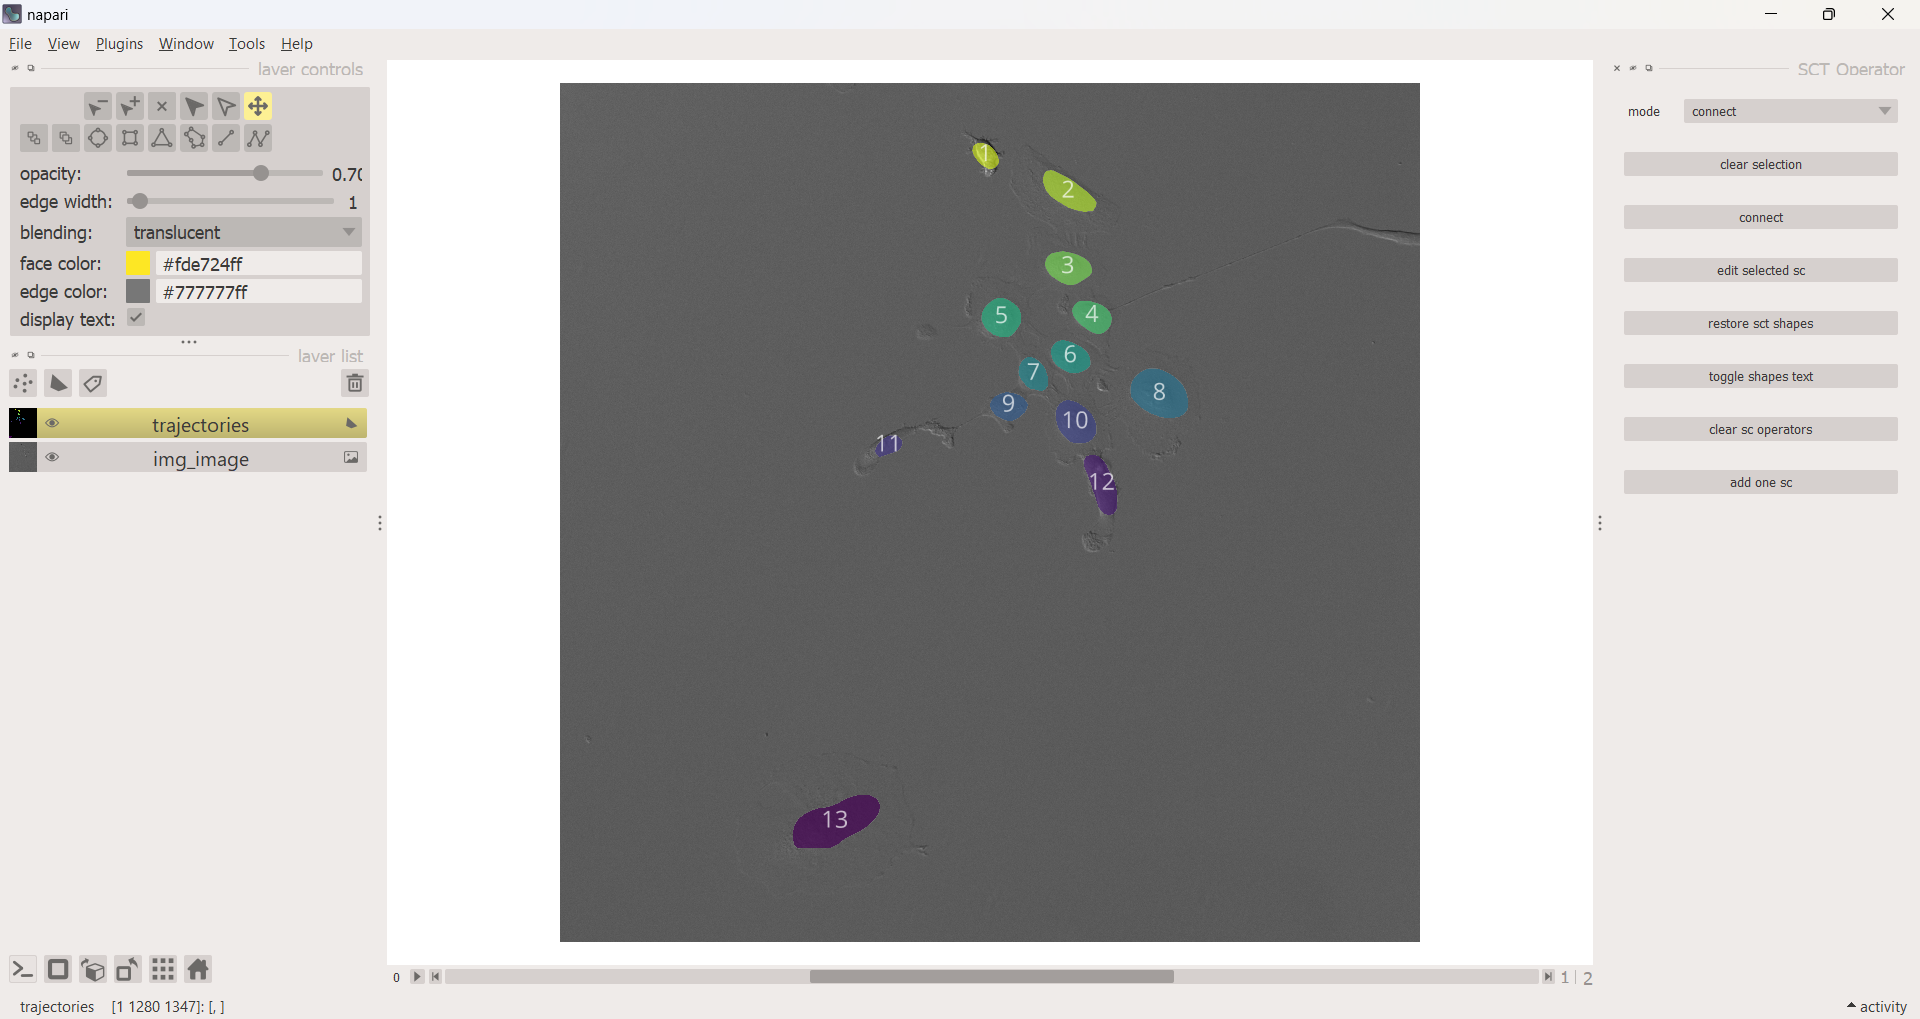

### Save edited collection of trajectories
After performing the desired edits on the trajectories using the Napari interface, it's essential to save them for future use or further analysis.

In [4]:
sct_opeartor.traj_collection.write_json("test.json", dataset_json_dir="./test_livecell_datasets")